In [388]:
import random
import time
import numpy as np
from scipy.stats import norm

In [389]:
class Person:
    def __init__(self, startingImmunity):
        if random.randint(0,100) < startingImmunity:
            self.immunity = True
        else:
            self.immunity = False
        
        self.contagiousness = 0
        self.mask = 0
        self.contagiousDays = 0
        self.friends = int((np.random.normal(size=1,loc=0.5,scale=0.15)[0]*10).round(0))
        self.obeylockdown = False
        
    def wearMask(self):
        self.contagiousness /= 2

In [390]:
populationList = []
def beginSim():
    startingPopulation = int(input("Starting Population"))
    startingImmunity = int(input("Percentage of people with natural immunity"))
    startingInfecters = int(input("How many people will be infectious at the beginning"))
    
    for x in range(startingPopulation):
        populationList.append(Person(startingImmunity))
        
    for x in range(0, startingInfecters):
        populationList[random.randint(0,len(populationList)-1)].contagiousness = int((np.random.normal(size=1,loc=0.5,scale=0.15)[0]*10).round(0)*10)
        
    daysContagious = int(input("Days Contagious"))
    lockdownDay = int(input("At which day lockdown will be declared"))
    lockdownPercentage = int(input("How much percentage of people will obey lockdown"))
    maskDay = int(input("At which day mask will be announced mandatory"))
    maskPercentage = int(input("How much percentage of people will obey facemask"))
    return daysContagious, lockdownDay,lockdownPercentage, maskDay, maskPercentage

In [391]:
def runDay(daysContagious, lockdown):
    for person in [person for person in populationList if person.contagiousness > 0  and person.friends > 0]:
        couldMeetFriends = int(person.friends/2)
        if couldMeetFriends > 0:
            metFriends = random.randint(0, couldMeetFriends)
        else:
            metFriends = 0
            
        if person.obeylockdown == True:
            metFriends = 0
            
        for x in range(metFriends):
            friend = populationList[random.randint(0,len(populationList)-1)]
            if random.randint(0,100) < person.contagiousness and friend.contagiousness == 0 and friend.immunity == False:
                friend.contagiousness = int((np.random.normal(size=1,loc=0.5,scale=0.15)[0]*10).round(0)*10)
                print(populationList.index(person), " >>> ", populationList.index(friend))
                
    for person in [person for person in populationList if person.contagiousness > 0]:
        person.contagiousDays += 1
        if person.contagiousDays >= daysContagious:
            person.contagiousness = 0
            person.immunity = True
            print(populationList.index(person), "has become immune")

In [392]:
lockdown = False
daysContagious, lockdownDay,lockdownPercentage, maskDay, maskPercentage = beginSim()
infectedTrack = []
for x in range(0,100):
    if x==lockdownDay:
        for person in populationList[0: int(len(populationList) * (lockdownPercentage/100))]:
            person.obeylockdown = True
        
    if x == maskDay:
        for person in populationList[0: int(len(populationList) * (maskPercentage/100))]:
            person.wearMask()

    runDay(daysContagious,lockdown)
    infectedTrack.append(len([person for person in populationList if person.contagiousness > 0]))

Starting Population5000
Percentage of people with natural immunity1
How many people will be infectious at the beginning1
Days Contagious7
At which day lockdown will be declared7
How much percentage of people will obey lockdown80
At which day mask will be announced mandatory15
How much percentage of people will obey facemask80
1897  >>>  1245
1245  >>>  3365
1245  >>>  2992
1897  >>>  382
3365  >>>  4524
3365  >>>  2159
3365  >>>  2135
382  >>>  3522
1245  >>>  1768
2992  >>>  1506
2992  >>>  89
2992  >>>  985
3365  >>>  3950
89  >>>  991
985  >>>  3639
1245  >>>  2723
1768  >>>  4516
1768  >>>  644
2992  >>>  4172
3522  >>>  4182
985  >>>  1193
985  >>>  3791
991  >>>  4350
1245  >>>  760
1897  >>>  992
2992  >>>  3322
3365  >>>  3763
3522  >>>  4052
4172  >>>  3099
4524  >>>  4576
1245 has become immune
1897 has become immune
4182  >>>  1816
4524  >>>  4952
4524  >>>  4974
4576  >>>  1104
3365 has become immune
4172  >>>  86
4182  >>>  3847
4952  >>>  4297
4952  >>>  3474
2992 has bec

In [393]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Infected people vs Days')

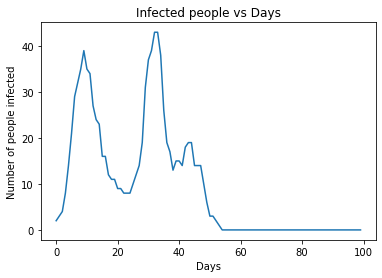

In [395]:
plt.plot(range(0,100), infectedTrack)
plt.xlabel("Days")
plt.ylabel("Number of people infected")
plt.title("Infected people vs Days")